### Lab Program 8:
### Title: Rule-Based Text Generator

In [ ]:
#2. Rule-based Text Generator
import random

subjects = ["The cat", "A dog", "The bird", "A rabbit"]
verbs = ["jumps", "runs", "flies", "sleeps"]
objects = ["over the fence", "in the park", "on the roof", "under the tree"]

def generate_sentence():
    subject = random.choice(subjects)
    verb = random.choice(verbs)
    obj = random.choice(objects)
    return f"{subject} {verb} {obj}."

# Generate 5 random sentences
for _ in range(5):
    print(generate_sentence())

The bird runs in the park.
A rabbit sleeps under the tree.
The cat jumps in the park.
The bird sleeps under the tree.
The cat sleeps under the tree.


### Lab Program 9:
### Title: Text Generation using Markov Chain Model

In [ ]:
# Program 1: 1. Markov Chain Text Generator (Simple Text Generation)

import random

# Sample training text (can be any corpus)
text = "To be or not to be, that is the question."

# Build Markov chain model (order=1)
def build_markov_chain(text):
    words = text.split()
    markov_chain = {}
    for i in range(len(words) - 1):
        curr_word = words[i]
        next_word = words[i + 1]
        if curr_word not in markov_chain:
            markov_chain[curr_word] = []
        markov_chain[curr_word].append(next_word)
    return markov_chain

def generate_text(chain, start_word, length=15):
    word = start_word
    output = [word]
    for _ in range(length-1):
        next_words = chain.get(word, None)
        if not next_words:
            break
        word = random.choice(next_words)
        output.append(word)
    return ' '.join(output)

markov_chain = build_markov_chain(text)
start = "To"
generated_text = generate_text(markov_chain, start)
print("Generated Text:\n", generated_text)

Generated Text:
 To be or not to be, that is the question.


### Lab Program 10:
### Title: Synthetic Data Generation using Gaussian Mixture Model (GMM)

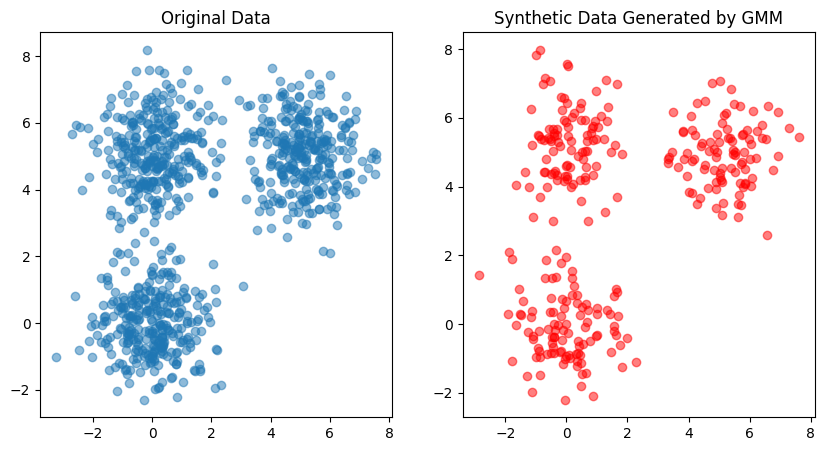

In [ ]:
#3. Synthetic Data Generation using Gaussian Mixture Model (GMM)
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 2D data from 3 Gaussians
np.random.seed(42)
n_samples = 300

# Real data: mixture of 3 clusters
X1 = np.random.randn(n_samples, 2) + np.array([0, 0])
X2 = np.random.randn(n_samples, 2) + np.array([5, 5])
X3 = np.random.randn(n_samples, 2) + np.array([0, 5])
X = np.vstack([X1, X2, X3])

# Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

# Sample new synthetic data
X_new, _ = gmm.sample(300)

# Plot original and synthetic data
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Data")
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.subplot(1,2,2)
plt.title("Synthetic Data Generated by GMM")
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.5, color='r')
plt.show()


### Lab Program 11:
### Title: Generator and Discriminator Models using MNIST Dataset

In [1]:
# Module 2: Deep Learning-Based Generative Models

In [ ]:
# Set up Common to all
# Install necessary libraries (only if needed)
!pip install tensorflow matplotlib --quiet

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (-1, 28*28))
x_test  = np.reshape(x_test, (-1, 28*28))


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype('float32') - 127.5) / 127.5  # Normalize to [-1, 1]
x_train = x_train.reshape(-1, 28*28)

# Generator
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(128, activation="relu", input_shape=(100,)),
        layers.Dense(784, activation="tanh")
    ])
    return model

# Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(128, activation="relu", input_shape=(784,)),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

# Build models
generator = build_generator()
discriminator = build_discriminator()

# Compile discriminator
discriminator.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Combined model (for training the generator)
z = layers.Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)
combined = tf.keras.Model(z, validity)
combined.compile(optimizer="adam", loss="binary_crossentropy")

# Train GAN
epochs = 1000
batch_size = 128
half_batch = batch_size // 2

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, x_train.shape[0], half_batch)
    real_imgs = x_train[idx]

    noise = np.random.normal(0, 1, (half_batch, 100))
    fake_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    if epoch % 2 == 0:
        print(f"{epoch} [D loss: {d_loss[0]}] [G loss: {g_loss}]")

        # Show generated images
        gen_imgs = generator.predict(np.random.normal(0, 1, (10, 100)))
        gen_imgs = 0.5 * gen_imgs + 0.5
        for i in range(10):
            plt.subplot(2, 5, i+1)
            plt.imshow(gen_imgs[i].reshape(28, 28), cmap='gray')
            plt.axis('off')
        plt.suptitle(f"Generated Images at Epoch {epoch}")
        plt.show()


